In [63]:
# only for test
from IPython import get_ipython
get_ipython().magic('reset -sf')  # clear cashes

import csv
import glob, os
import pandas as pd


print('aa')
print(os.path.abspath('.'))




aa
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src


In [64]:
# initialisation
# TODO: move all packages here but not for now

featureDict = {'down': {} , 'up': {}, 'left': {}, 'right': {}, 'fist': {}}


In [65]:
# load data from csv files
# feature extraction
# TODO: freq-domain features 
# TODO: feature selection
# TODO: normalisation

import math
import numpy as np
import csv
import glob, os
import pandas as pd
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# locate folers
actionList = ['down', 'up', 'left', 'right', 'fist']
for currentAction in range(len(actionList)):
    filePath1 = os.path.abspath('./Dataset/hyqData/' + actionList[currentAction])
    filePath2 = os.path.abspath('./Dataset/zjhData/' + actionList[currentAction])
    filePath3 = os.path.abspath('./Dataset/sgfData/' + actionList[currentAction])
#     filePath4 = os.path.abspath('./Dataset/znData/' + actionList[currentAction])

    print('Loading action: ' + actionList[currentAction])


    file1 = glob.glob(os.path.join(filePath1, "*.csv"))
#     file2 = glob.glob(os.path.join(filePath2, "*.csv"))
#     file3 = glob.glob(os.path.join(filePath3, "*.csv"))
#     file4 = glob.glob(os.path.join(filePath4, "*.csv"))


    dl = []
    for f in file1:
        dl.append(pd.read_csv(f, header=None))
#     for f in file2:
#         dl.append(pd.read_csv(f, header=None))
#     for f in file3:
#         dl.append(pd.read_csv(f, header=None))
#     for f in file4:
#         dl.append(pd.read_csv(f, header=None))



    # obtain each EMG channel data
    

    featureList = []
    
    fs = 100 # sample frequency
    T = 1/fs # sample rate

    csvFileIndex=0
    currentCSV=0
    for csvFileIndex in range(len(dl)): # access every csv file
        emg_1=[]
        emg_2=[]
        emg_3=[]
        for currentCSV in range(len(dl[csvFileIndex].values.tolist())): # access every recorded sample
            emg_1.append(dl[csvFileIndex].values.tolist()[currentCSV][0])
            emg_2.append(dl[csvFileIndex].values.tolist()[currentCSV][1])
            emg_3.append(dl[csvFileIndex].values.tolist()[currentCSV][2])


        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        mav_emg_1 = 0
        mav_emg_2 = 0
        mav_emg_3 = 0
        # Wavelength
        wl_emg_1 = 0
        wl_emg_2 = 0
        wl_emg_3 = 0
        # Slope Sign Changes
        sscThreshold = 0 # TODO: detemine the threshold
        ssc_emg_1 = 0
        ssc_emg_2 = 0
        ssc_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        zc_emg_1 = 0
        zc_emg_2 = 0
        zc_emg_3 = 0
        # Root Mean Square
        rms_emg_1 = 0.0
        rms_emg_2 = 0.0
        rms_emg_3 = 0.0
        # frequency-domain features
        # Mean Frequency
        meanFreq_emg_1 = 0.0
        meanFreq_emg_2 = 0.0
        meanFreq_emg_3 = 0.0
        # Median Frequency
        medianFreq_emg_1 = 0.0
        medianFreq_emg_2 = 0.0
        medianFreq_emg_3 = 0.0
        # Mean Power
        meanPower_emg_1 = 0.0
        meanPower_emg_2 = 0.0
        meanPower_emg_3 = 0.0
        # Variance of Central Frequency
        vcf_emg_1 = 0.0
        vcf_emg_2 = 0.0
        vcf_emg_3 = 0.0
        
        # some temporary variables
        
        abs_sum_temp1=0
        abs_sum_temp2=0
        abs_sum_temp3=0
        ssc_temp1=0
        ssc_temp2=0
        ssc_temp3=0
        rms_temp1=0.0
        rms_temp2=0.0
        rms_temp3=0.0
        
        freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
        freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
        freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
        nominatorValue_temp1=0
        nominatorValue_temp2=0
        nominatorValue_temp3=0
        denominatorValue_temp1=0
        denominatorValue_temp2=0
        denominatorValue_temp3=0
        sm2_temp1=0
        sm2_temp2=0
        sm2_temp3=0
        
        i=0
        for i in range(len(emg_3)):
            abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
            abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
            abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))
            
            rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
            rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
            rms_temp3 = rms_temp3 + (int(emg_3[i]))**2
            
            if(i>0):
                wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
            if(i>1):
                ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if ssc_temp1 >= sscThreshold:
                    ssc_emg_1 = ssc_emg_1 + 1
                if ssc_temp2 >= sscThreshold:
                    ssc_emg_2 = ssc_emg_2 + 1
                if ssc_temp3 >= sscThreshold:
                    ssc_emg_3 = ssc_emg_3 + 1
            
            mav_emg_1 = abs_sum_temp1/len(emg_1)
            mav_emg_2 = abs_sum_temp2/len(emg_2)
            mav_emg_3 = abs_sum_temp3/len(emg_3)

            rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
            rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
            rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))
            
        j=0
        for j in range(len(freqs_temp1)):
            nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
            nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
            nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
            denominatorValue_temp1 += psd_temp1[j]
            denominatorValue_temp2 += psd_temp2[j]
            denominatorValue_temp3 += psd_temp3[j]
            sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
            sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
            sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]
            
        meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
        meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
        meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

        medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
        medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
        medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]
        
        meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
        meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
        meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)
        
        vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
        vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
        vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
            
        featureDict[actionList[currentAction]][csvFileIndex] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                                                wl_emg_1, wl_emg_2, wl_emg_3, 
                                                                ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                                                rms_emg_1, rms_emg_2, rms_emg_3, 
                                                                meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                                                medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                                                meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                                                vcf_emg_1, vcf_emg_2, vcf_emg_3]
        
#         TODO: visualisation
#         print(ssc_emg_1, ssc_emg_2, ssc_emg_3)
#         print(mav_emg_1, mav_emg_2, mav_emg_3)
#         print(wl_emg_1, wl_emg_2, wl_emg_3)
#         print(rms_emg_1, rms_emg_2, rms_emg_3)
#         print(round(meanFreq_emg_1,2), round(medianFreq_emg_1,2), round(meanPower_emg_1,2), round(vcf_emg_1,2))
#         print('processing the next file')

print('Loading completed')



Loading action: down
0.85 16.41 11.48 8.59
1.3 47.66 9.55 11.4
1.46 31.25 1.25 18.34
1.35 16.02 44.44 5.88
1.06 21.48 13.39 9.92
1.18 17.97 14.53 10.77
1.74 19.53 1.5 19.67
2.29 12.5 3.02 30.46
1.5 25.78 4.15 9.24
1.52 25.78 7.48 13.46
1.28 46.48 17.25 13.95
1.88 39.84 6.88 11.89
1.64 15.62 6.43 15.46
1.99 40.62 6.4 15.12
1.19 42.97 5.18 10.89
1.46 33.59 8.12 5.92
0.96 28.52 11.51 7.55
1.14 10.94 22.64 9.3
1.92 35.94 2.24 15.98
1.28 25.39 12.02 8.66
1.49 21.48 8.66 10.32
2.04 41.41 23.93 24.56
1.71 22.27 4.42 10.21
1.3 50.0 8.97 12.84
1.4 36.33 5.93 14.66
Loading action: up
4.64 18.75 0.02 54.43
2.33 9.38 0.46 18.5
1.47 34.38 0.76 14.22
2.71 23.05 0.29 38.31
1.88 32.42 1.64 16.38
1.12 25.39 0.17 13.16
12.36 36.72 4.59 195.18
2.29 46.48 0.17 13.49
2.48 9.38 0.11 25.39
3.7 21.09 0.48 32.2
2.49 27.73 0.27 18.28
2.21 46.48 0.04 40.28
4.16 23.83 0.2 29.65
0.88 41.8 0.67 5.79
4.21 27.34 0.03 63.89
0.97 27.73 0.4 10.45
3.66 18.36 0.17 34.42
1.91 24.61 0.41 19.65
2.17 28.52 0.16 25.56
3.4 23.4

In [101]:
print([round(test,1) for test in featureDict['down'][0]])
print([round(test,1) for test in featureDict['up'][1]])
print([round(test,1) for test in featureDict['left'][2]])
print([round(test,1) for test in featureDict['right'][2]])
print([round(test,1) for test in featureDict['fist'][2]])

[39.7, 55.2, 74.9, 499, 522, 1652, 219, 196, 215, 46.8, 64.4, 170.2, 0.9, 1.2, 0.9, 16.4, 18.0, 41.8, 11.5, 7.0, 199.1, 8.6, 6.5, 1.1]
[21.5, 187.4, 76.3, 163, 1275, 834, 260, 142, 203, 22.2, 230.3, 121.4, 2.3, 0.7, 0.6, 9.4, 14.8, 36.7, 0.5, 374.4, 183.6, 18.5, 0.4, 0.6]
[64.5, 62.7, 14.6, 1209, 765, 178, 210, 186, 253, 117.3, 95.5, 22.1, 0.7, 0.5, 0.9, 36.3, 43.8, 18.0, 34.2, 32.7, 2.0, 1.3, 0.6, 1.1]
[30.0, 72.6, 40.1, 432, 714, 1069, 220, 185, 238, 34.7, 83.7, 102.3, 2.0, 1.0, 1.3, 24.6, 49.2, 17.6, 8.0, 19.9, 181.2, 12.9, 3.1, 1.5]
[36.0, 92.0, 17.7, 1185, 1468, 498, 454, 338, 460, 75.0, 126.8, 33.1, 0.4, 0.6, 0.4, 26.2, 37.9, 16.4, 15.2, 24.2, 3.2, 0.7, 2.6, 1.3]


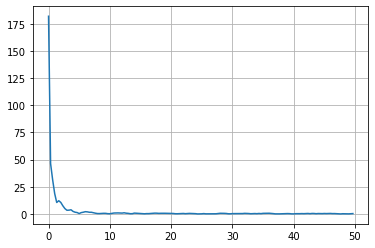

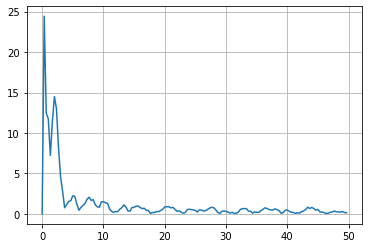

0.8781626790867191
28.90625
21.91596608539089
2.512096817876756


In [40]:
# frequency-domain features
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# os.path.abspath('./Dataset/hyqData')
# dl = []
# for f in file1:
#     dl.append(pd.read_csv(f, header=None))
    
# emg_1=[]
# emg_2=[]
# emg_3=[]

# for row in range(len(dl[0])):
#     emg_1.append(dl[0].values.tolist()[row][0])
#     emg_2.append(dl[0].values.tolist()[row][1])
#     emg_3.append(dl[0].values.tolist()[row][2])

# mean frequency
meanFreq = 0
# variance of central frequency
VCF=0
# median frequency
medianFreq = 0
# mean power
meanPower = 0



T=1/100 # sample rate
N=len(emg_2)
freqDict={}
yf=fft(emg_2)
xf = fftfreq(N, T)[:N//2] #0.3344 per sample

plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
plt.grid()
plt.show()

detrendSig = signal.detrend(emg_2)
yf=fft(detrendSig)
xf = fftfreq(N, T)[:N//2] #0.3344 per sample
plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
plt.grid()
plt.show()

freqs, psd = signal.welch(signal.detrend(emg_3), 100)
nominatorValue=0
denominatorValue=0
SM2=0
for i in range(len(freqs)):
    nominatorValue += freqs[i]*psd[i]
    denominatorValue += psd[i]
    SM2 += np.square(freqs[i])*psd[i] 
    
meanFreq = nominatorValue/denominatorValue

medianFreq = freqs[np.argsort(psd)[len(psd)//2]]

meanPower = denominatorValue/len(freqs)


VCF = SM2/denominatorValue - np.square(nominatorValue/denominatorValue)

print(meanFreq)
print(medianFreq)
print(meanPower)
print(VCF)


# Pxx_den = np.reshape( Pxx_den, (1,-1) ) 
# width = np.tile(f[1]-f[0], (1, Pxx_den.shape[1]))
# f = np.reshape(f, (1, -1))
# P = Pxx_den * width
# pwr = np.sum(P)
# mnfreq = np.dot(P, f.T)/pwr





In [39]:
listtemp = (2.0/N * np.abs(yf[0:N//2][:]))
print(xf[3]-xf[2]) #

print(len(freqs))


300


In [4]:
# TODO: feature selection
# TODO: visualisation (if possible)

print(featureDict.keys())
print(len(featureDict['down']))
print(len(featureDict['up']))
print(len(featureDict['left']))
print(len(featureDict['right']))
print(len(featureDict['fist']))
print(featureDict['down'][0])
print(featureDict['up'][0])
print(featureDict['left'][0])
print(featureDict['right'][0])
print(featureDict['fist'][0])


dict_keys(['down', 'up', 'left', 'right', 'fist'])
75
70
69
70
75
[39.693333333333335, 55.17666666666667, 74.89666666666666, 499, 522, 1652, 219, 196, 215, 46.753894668430206, 64.37931862536809, 170.15286264611203]
[17.243333333333332, 171.14, 105.74333333333334, 40, 1030, 610, 297, 147, 157, 17.271460081108756, 216.06070134725258, 131.5700700514115]
[52.26, 71.05666666666667, 18.476666666666667, 964, 774, 168, 227, 198, 255, 85.64395289024594, 101.17929630117023, 27.522899556551085]
[59.38, 72.19, 59.7, 966, 705, 1261, 195, 174, 232, 76.48424674401913, 85.48288327690716, 137.3561550616984]
[58.67666666666667, 118.07333333333334, 32.553333333333335, 1285, 1341, 802, 226, 168, 234, 103.38170373265604, 130.02540777350657, 53.41891050929436]


(78, 24)
(78, 6)
(26, 24)
(26, 6)
(26, 24)
(26, 6)
Epoch 1/50
2/2 [==============================] - 0s 106ms/step - loss: 298.7369 - accuracy: 0.1795 - val_loss: 278.6579 - val_accuracy: 0.1923
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 233.2525 - accuracy: 0.1795 - val_loss: 215.4613 - val_accuracy: 0.1923
Epoch 3/50
2/2 [==============================] - 0s 11ms/step - loss: 170.1064 - accuracy: 0.1923 - val_loss: 166.0642 - val_accuracy: 0.2308
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 124.0906 - accuracy: 0.2821 - val_loss: 140.8643 - val_accuracy: 0.2308
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 95.7614 - accuracy: 0.2308 - val_loss: 113.9839 - val_accuracy: 0.2308
Epoch 6/50
2/2 [==============================] - 0s 11ms/step - loss: 66.8524 - accuracy: 0.2821 - val_loss: 87.1205 - val_accuracy: 0.2692
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 48.0091 - accuracy: 0.

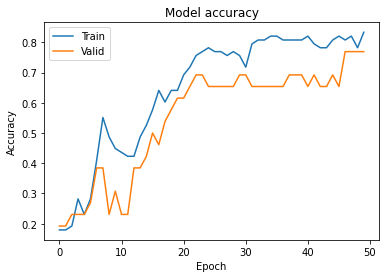

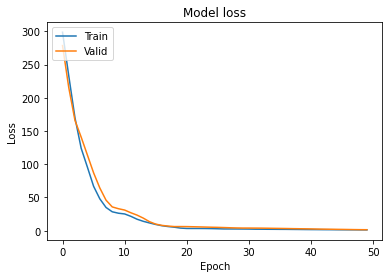

Test loss: 3.500629186630249
Test accuracy: 0.7307692170143127


In [107]:
# create labels for data samples

from keras.utils import np_utils
x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'left': 1,
        'right': 2,
        'up': 3,
        'down': 4,
        'fist': 5
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['down', 'up', 'left', 'right', 'fist']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)


state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)




# TODO: Model

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
tf.random.set_seed(1234)

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(x_train.shape)))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

# opt = RMSprop(lr=0.1, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=50, batch_size=50, validation_data=(x_validate, y_validate_class))

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])